# Introduction
Exoplanets, celestial bodies orbiting stars outside our solar system, have captured the curiosity of scientists and enthusiasts alike for decades. With advancements in technology and observational techniques, the discovery and characterization of exoplanets have flourished, providing invaluable insights into the vast diversity of planetary systems beyond our own.

In this study, we delve into the realm of exoplanetary science, focusing on a dataset rich in essential metrics characterizing these distant worlds. This dataset comprises vital parameters such as the exoplanet's name, its orbital period in days, radius in Earth radii, equilibrium temperature, ratio of planetary radius to stellar radius (rp over rs), transit depth, and semi-major axis in astronomical units (AU). These metrics collectively offer a comprehensive snapshot of the properties and dynamics of various exoplanetary systems.

Our primary objective in this investigation is to tackle the formidable challenge of predicting exoplanet temperatures. Despite the wealth of information contained within the dataset, this task presents a considerable hurdle due to the absence of a single metric closely correlating with planet temperature. Therefore, we will be employing advanced supervised learning techniques learned throughout the course to discern patterns and relationships.

# Exploratory Data Analysis

### Importing Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Reading in the Data
The data comes in a non-standard text format.  It is close enough to a CSV, that we can read it in with a specialized Pandas function.

There is no test set for the data, so we will be splitting this set later in the process in order to perform fair model evaluation.

In [2]:
def read_data(file_path):
    column_names = [
        "name",
        "period_in_days",
        "planet_radius_in_earth_radii",
        "planet_equilibrium_temperature",
        "rp_over_rs",
        "transit_depth",
        "semimajor_axis_in_au"
    ]

    data = pd.read_csv(file_path, sep='|', header=0, names=column_names, skipinitialspace=True, na_values="nan")
    data = data.dropna()

    return data

file_path = 'transiting-exoplanets.txt'
data = read_data(file_path)
print(data)

              name period_in_days planet_radius_in_earth_radii  \
0        55 Cnc e       0.736539                         1.91    
1        AU Mic b        8.46321                        4.203    
2     BD+20 594 b        41.6855                        2.578    
3       CoRoT-1 b      1.5089557                         16.7    
4      CoRoT-10 b        13.2406                        10.87    
...            ...            ...                          ...   
3293       XO-4 b        4.12508                       14.011    
3294       XO-5 b      4.1877558                        12.78    
3295       XO-6 b      3.7650007                       23.203    
3296       XO-7 b      2.8641424                        15.39    
3297     pi Men c         6.2679                        2.042    

     planet_equilibrium_temperature             rp_over_rs  \
0               1954.9818016218196   0.018628369100156278    
1                601.4419075824626   0.051376846916774466    
2                546.

### Examining the Data
It appears most fields have been misinterpretted as strings.  This is probably because NaN's are written as "nan".  Aside from that, we dropped all nan's above and are dealing with mostly clean data.  Later, we will convert the datatypes.

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3275 entries, 0 to 3297
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            3275 non-null   object 
 1   period_in_days                  3275 non-null   object 
 2   planet_radius_in_earth_radii    3275 non-null   object 
 3   planet_equilibrium_temperature  3275 non-null   object 
 4   rp_over_rs                      3275 non-null   object 
 5   transit_depth                   3275 non-null   object 
 6   semimajor_axis_in_au            3275 non-null   float64
dtypes: float64(1), object(6)
memory usage: 204.7+ KB


### Semimajor Axis in AU Observation
We can see that many of these planets are very close to their star.  1 AU = the distance from the Earth to the Sun.  The average semimajor axis, the farthest point in the planet's orbit, is just about 0.13 AU!

In [68]:
data.describe()

,semimajor_axis_in_au
count,3275.000000
mean,0.132200
std,0.191801
min,0.005800
25%,0.048168
50%,0.080000
75%,0.143132
max,4.500000


### Inspecting Correlations
We can see that a few of the metrics correlate very closely.  These are all different measurements related to the orbit of the planet, so it makes sense that they correlate, and attests to the quality of the data.

Unfortunately, nothing strongly correlates with temperature, making temperature a challenging data point to predict.  Fortunately, some things such as radius, semi major axis, and period in days weakly correlate, and may provide the model with enough data when combined.

                                period_in_days  planet_radius_in_earth_radii  \
period_in_days                        1.000000                      0.021170   
planet_radius_in_earth_radii          0.021170                      1.000000   
planet_equilibrium_temperature       -0.280430                      0.416413   
rp_over_rs                           -0.003715                      0.203511   
transit_depth                        -0.004732                      0.026747   
semimajor_axis_in_au                  0.915184                     -0.021542   

                                planet_equilibrium_temperature  rp_over_rs  \
period_in_days                                       -0.280430   -0.003715   
planet_radius_in_earth_radii                          0.416413    0.203511   
planet_equilibrium_temperature                        1.000000    0.009895   
rp_over_rs                                            0.009895    1.000000   
transit_depth                                    

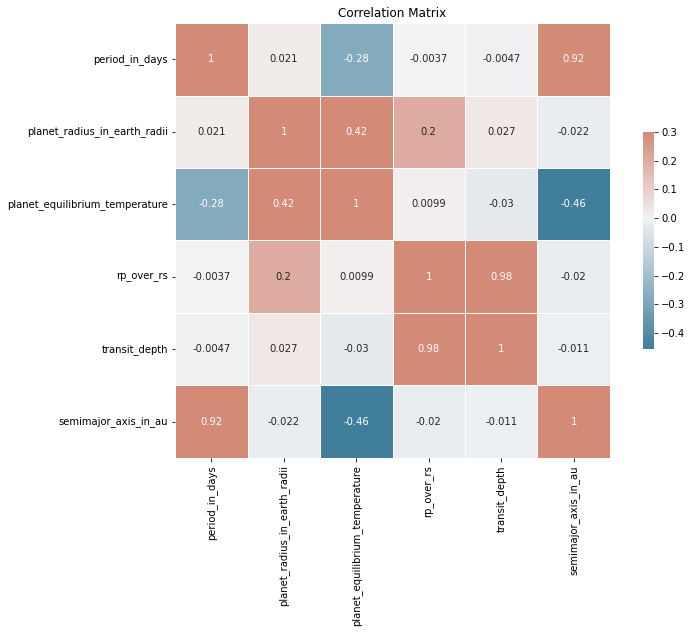

In [69]:
def visualize_correlation_matrix(df):
    df_numeric = df.drop(columns=['name'])
    corr = df_numeric.corr()

    print(corr)

    plt.figure(figsize=(12, 8))

    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    plt.title('Correlation Matrix')
    plt.show()

visualize_correlation_matrix(data)

### Additional Cleaning 
We will drop the name column so we can do more analysis.  It is useless to predicting the temperature.

In [6]:
data = data.drop(columns=['name'])

### Exploring Distributions
We will plot all characteristics to see if there are any distribution trends.

It appears that there is not much aside from the semi major axis being relatively tight.

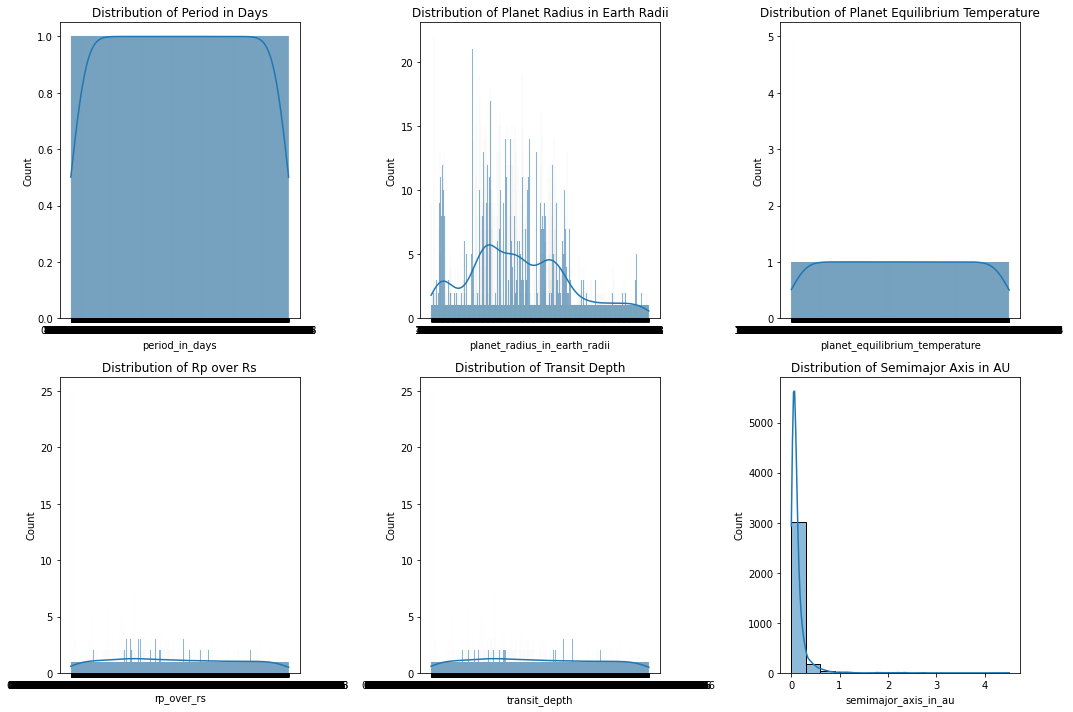

In [70]:
plt.figure(figsize=(15, 10))

# Subplot 1: Period in Days
plt.subplot(2, 3, 1)
sns.histplot(data['period_in_days'], bins=15, kde=True)
plt.title('Distribution of Period in Days')

# Subplot 2: Planet Radius in Earth Radii
plt.subplot(2, 3, 2)
sns.histplot(data['planet_radius_in_earth_radii'].dropna(), bins=15, kde=True)
plt.title('Distribution of Planet Radius in Earth Radii')

# Subplot 3: Planet Equilibrium Temperature
plt.subplot(2, 3, 3)
sns.histplot(data['planet_equilibrium_temperature'], bins=15, kde=True)
plt.title('Distribution of Planet Equilibrium Temperature')

# Subplot 4: Rp over Rs
plt.subplot(2, 3, 4)
sns.histplot(data['rp_over_rs'].dropna(), bins=15, kde=True)
plt.title('Distribution of Rp over Rs')

# Subplot 5: Transit Depth
plt.subplot(2, 3, 5)
sns.histplot(data['transit_depth'].dropna(), bins=15, kde=True)
plt.title('Distribution of Transit Depth')

# Subplot 6: Semimajor Axis in AU
plt.subplot(2, 3, 6)
sns.histplot(data['semimajor_axis_in_au'], bins=15, kde=True)
plt.title('Distribution of Semimajor Axis in AU')

plt.tight_layout()
plt.show()

### Planet Radius Vs Temperature
There is not much of a clear relation here.  Many of these values seem to fit within certain bounds. 

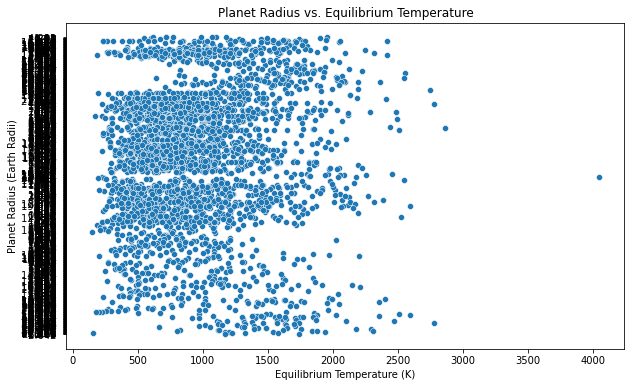

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='planet_equilibrium_temperature', y='planet_radius_in_earth_radii', data=data)
plt.title('Planet Radius vs. Equilibrium Temperature')
plt.xlabel('Equilibrium Temperature (K)')
plt.ylabel('Planet Radius (Earth Radii)')
plt.show()

### RP over RS vs Temperature
This looks very similar to the above chart.  There is not much of a clear relationship.

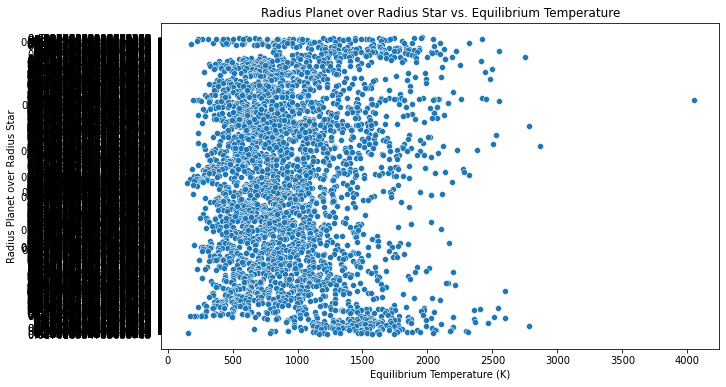

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='planet_equilibrium_temperature', y='rp_over_rs', data=data)
plt.title('Radius Planet over Radius Star vs. Equilibrium Temperature')
plt.xlabel('Equilibrium Temperature (K)')
plt.ylabel('Radius Planet over Radius Star')
plt.show()

### Semi Major Axis vs Temperature
This is a more interesting chart.  It shows that there may be a relationship between temperature and semi major axis, but it is not a linear one.

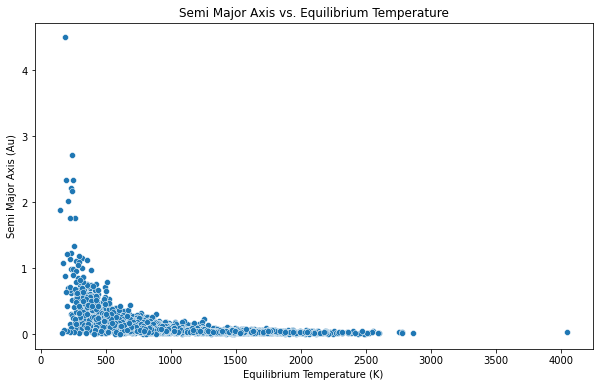

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='planet_equilibrium_temperature', y='semimajor_axis_in_au', data=data)
plt.title('Semi Major Axis vs. Equilibrium Temperature')
plt.xlabel('Equilibrium Temperature (K)')
plt.ylabel('Semi Major Axis (Au)')
plt.show()

### Principal Component Analysis
PCA shows a similar result between semi major axis and temperature.  The PCA plot resembles the above plot, but is cleaner.

[0.72814033 0.27185967]


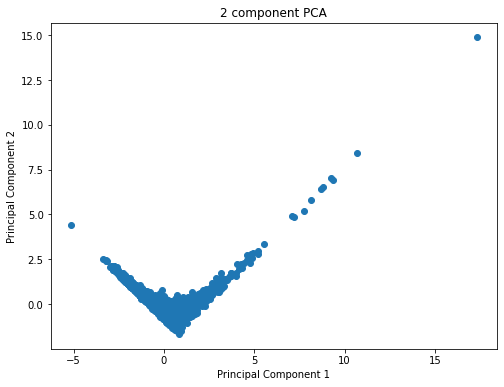

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['semimajor_axis_in_au', 'planet_equilibrium_temperature']
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['semimajor_axis_in_au', 'planet_equilibrium_temperature'])

print(pca.explained_variance_ratio_)

plt.figure(figsize=(8,6))
plt.scatter(principalDf['semimajor_axis_in_au'], principalDf['planet_equilibrium_temperature'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA (Semi-major Axis and Temperature)')
plt.show()

### Data Cleaning (Old)
This wa an old data cleaning test to fix some missing values and datatype issues.  I superseeded it in following cells, and commented it out for reproducibility's sake.

In [57]:
# data.replace('nan', np.nan, inplace=True)
# data.info()
# data_clean = data.dropna()

# data_clean['semimajor_axis_in_au'] = pd.to_numeric(data_clean['semimajor_axis_in_au'], errors='coerce')
# data_clean['planet_equilibrium_temperature'] = pd.to_numeric(data_clean['planet_equilibrium_temperature'], errors='coerce')
# data_clean['planet_radius_in_earth_radii'] = pd.to_numeric(data_clean['planet_radius_in_earth_radii'], errors='coerce')

# data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3298 entries, 0 to 3297
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            3298 non-null   object 
 1   period_in_days                  3298 non-null   object 
 2   planet_radius_in_earth_radii    3298 non-null   object 
 3   planet_equilibrium_temperature  3298 non-null   object 
 4   rp_over_rs                      3298 non-null   object 
 5   transit_depth                   3298 non-null   object 
 6   semimajor_axis_in_au            3275 non-null   float64
dtypes: float64(1), object(6)
memory usage: 180.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 3275 entries, 0 to 3297
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            3275 non-null   object 
 1   pe

C:\Users\Fanta\AppData\Local\Temp\ipykernel_26756\1746202172.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['semimajor_axis_in_au'] = pd.to_numeric(data_clean['semimajor_axis_in_au'], errors='coerce')
C:\Users\Fanta\AppData\Local\Temp\ipykernel_26756\1746202172.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['planet_equilibrium_temperature'] = pd.to_numeric(data_clean['planet_equilibrium_temperature'], errors='coerce')
C:\Users\Fanta\AppData\Local\Temp\ipykernel_26756\17462021

# Model Building and Training
Now it is time to build and train a model.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Multi-Linear Regression and Data Split
In this cell, I am converting the data to float format so it can be trained on

Then, I am creating testing and training sets.  I used 20% for test, and 80% for train.

I then construct a basic Linear Regression model on the **entire** dataset in order to determine if a linear model could even represent the data.

In [27]:
cols_to_convert = ['planet_radius_in_earth_radii', 'period_in_days', 'rp_over_rs', 'transit_depth', 'semimajor_axis_in_au', 'planet_equilibrium_temperature']
data[cols_to_convert] = data[cols_to_convert].astype(float)

data.info()

data.dropna(inplace=True)
data.fillna(0.0, inplace=True)

X = data.drop(columns=['planet_equilibrium_temperature'], axis=1)
y = data['planet_equilibrium_temperature']

data.head(5)

# Check for NaN values in the data
print("NaN values in target y:", y.isna().sum())
print("NaN values in X:\n", X.isna().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X, y)

<class 'pandas.core.frame.DataFrame'>
Index: 3248 entries, 0 to 3297
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   period_in_days                  3248 non-null   float64
 1   planet_radius_in_earth_radii    3248 non-null   float64
 2   planet_equilibrium_temperature  3248 non-null   float64
 3   rp_over_rs                      3248 non-null   float64
 4   transit_depth                   3248 non-null   float64
 5   semimajor_axis_in_au            3248 non-null   float64
dtypes: float64(6)
memory usage: 177.6 KB
NaN values in target y: 0
NaN values in X:
 period_in_days                  0
planet_radius_in_earth_radii    0
rp_over_rs                      0
transit_depth                   0
semimajor_axis_in_au            0
dtype: int64


LinearRegression()

In [28]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Model Parameters:", model.get_params())

Coefficients: [ 3.76123676e+00  1.07923730e+02 -1.04760707e+04  1.07574038e+03
 -2.89830046e+03]
Intercept: 1187.070726780768
Model Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


### The Verdict on a Linear Model
The R-Squared of the model trained on the entire dataset is not promising.  It is only 0.57.  Error is even worse for a linear model (not shown) trained on the training set and tested on the test set.  Therefore, we will look towards using a more advanced model.

In [29]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 79650.87593363138
R-squared: 0.5701162481898643


### Examining the Linear Model
This chart shows the linear model.  It looks okay, but clearly cannot model the relation of the data, as seen my the moderate R-Squared value.

C:\Users\Fanta\AppData\Local\Temp\ipykernel_26052\97299290.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')


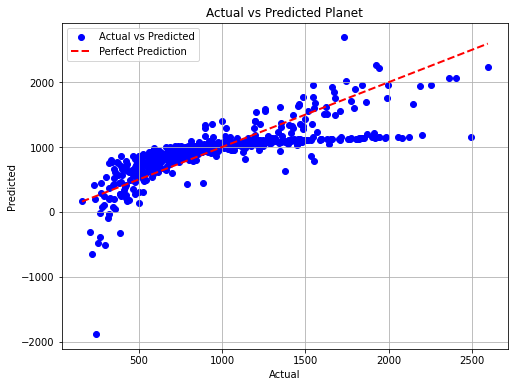

In [30]:
predictions = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Planet')
plt.legend()
plt.grid(True)
plt.show()

### Support Vector Machines
Due to the adaptable and tuneable nature of SVMs, I think they might be a good fit for this data.

We will start with a simple RBF Support Vector Regression model.

In [35]:
from sklearn.svm import SVR

# Create SVR model
svr_model = SVR(kernel='rbf')

# Fit the SVR model
svr_model.fit(X_train, y_train)

SVR()

### First Results
Not good.  R-Squared is worse than the linear model.  This is not, however, unexpected as the parameters have not been tuned yet. 

In [36]:
# Make predictions
svr_predictions = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 153295.07215333506
R-squared: 0.17265114816576377


### Adjusting C
Just by adjusting C to 10.0, we see a significant improvement to 0.42.  This is still worse than the linear model, but promising.

In [46]:
svr_model_2 = SVR(kernel='rbf', C=10.0, gamma='scale')
svr_model_2.fit(X_train, y_train)

SVR(C=10.0)

In [47]:
# Make predictions
svr_predictions = svr_model_2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 106143.62223765855
R-squared: 0.4271322440162134


## Iterations of Optimization
What follows is a long chain of exploring C values.  The result of this ends up being that an extremely large C value works great.

All models are trained on the training set, and then scored on the testing set, so while this is odd, it is defendable through the testing means.

*n_jobs permits multiprocessing.  These parameter grids start to take a long time, so this parameter helps, if your computer supports it*

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

svr_model_3 = SVR()

grid_search = GridSearchCV(svr_model_3, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=8)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'C': 10}


In [51]:
svr_predictions = best_estimator.predict(X_test)

mse = mean_squared_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 106143.62223765855
R-squared: 0.4271322440162134


In [52]:
param_grid = {
    'C': range(10,25)
}

svr_model_3 = SVR()

grid_search = GridSearchCV(svr_model_3, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=8)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'C': 24}


In [53]:
svr_predictions = best_estimator.predict(X_test)

mse = mean_squared_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 92842.7407013317
R-squared: 0.4989184333103863


In [54]:
param_grid = {
    'C': range(24,50)
}

svr_model_3 = SVR()

grid_search = GridSearchCV(svr_model_3, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=8)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'C': 49}


In [55]:
svr_predictions = best_estimator.predict(X_test)

mse = mean_squared_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 84821.19628765307
R-squared: 0.5422115116029227


In [56]:
param_grid = {
    'C': range(49,101)
}

svr_model_3 = SVR()

grid_search = GridSearchCV(svr_model_3, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=8)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'C': 100}


In [57]:
svr_predictions = best_estimator.predict(X_test)

mse = mean_squared_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 79845.53213120058
R-squared: 0.5690656692032143


In [58]:
param_grid = {
    'C': range(100,500,5)
}

svr_model_3 = SVR()

grid_search = GridSearchCV(svr_model_3, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=8)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'C': 495}


In [59]:
svr_predictions = best_estimator.predict(X_test)

mse = mean_squared_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 74369.25052182571
R-squared: 0.5986217093171801


In [60]:
param_grid = {
    'C': range(495,1000,10)
}

svr_model_3 = SVR()

grid_search = GridSearchCV(svr_model_3, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=8)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'C': 995}


In [61]:
svr_predictions = best_estimator.predict(X_test)

mse = mean_squared_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 72407.27393645914
R-squared: 0.6092106933753565


In [62]:
param_grid = {
    'C': range(990, 2000, 10)
}

svr_model_3 = SVR()

grid_search = GridSearchCV(svr_model_3, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=8)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'C': 1990}


In [63]:
svr_predictions = best_estimator.predict(X_test)

mse = mean_squared_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 71147.68330271322
R-squared: 0.6160088301319541


In [64]:
param_grid = {
    'C': range(1900, 10000, 100)
}

svr_model_3 = SVR()

grid_search = GridSearchCV(svr_model_3, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=8)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'C': 9900}


In [65]:
svr_predictions = best_estimator.predict(X_test)

mse = mean_squared_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 68824.78632841952
R-squared: 0.6285457376633896


In [66]:
param_grid = {
    'C': range(10000, 20000, 100),
    'gamma': ['scale', 'auto']
}

svr_model_3 = SVR()

grid_search = GridSearchCV(svr_model_3, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=8)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'C': 19900, 'gamma': 'auto'}


In [67]:
svr_predictions = best_estimator.predict(X_test)

mse = mean_squared_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 32333.13308950125
R-squared: 0.8254948436239056


In [68]:
param_grid = {
    'C': range(20000, 25000, 100),
    'gamma': ['scale', 'auto']
}

svr_model_3 = SVR()

grid_search = GridSearchCV(svr_model_3, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=8)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'C': 24900, 'gamma': 'auto'}


In [69]:
svr_predictions = best_estimator.predict(X_test)

mse = mean_squared_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 31155.958436050565
R-squared: 0.8318481730836198


In [75]:
param_grid = {
    'C': range(25000, 50000, 1000),
    'gamma': ['scale', 'auto']
}

svr_model_3 = SVR()

grid_search = GridSearchCV(svr_model_3, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=8)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'C': 49000, 'gamma': 'auto'}


In [76]:
svr_predictions = best_estimator.predict(X_test)

mse = mean_squared_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 29573.779588044366
R-squared: 0.840387350729102


In [73]:
param_grid = {
    'C': range(50000, 100000, 1000),
    'gamma': ['auto']
}

svr_model_3 = SVR()

grid_search = GridSearchCV(svr_model_3, param_grid, cv=2, scoring='neg_mean_squared_error', n_jobs=8)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'C': 96000, 'gamma': 'auto'}


In [77]:
svr_predictions = best_estimator.predict(X_test)

mse = mean_squared_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 29573.779588044366
R-squared: 0.840387350729102


### A Sign of An Optimized Parameter
This last test shows that the best C value is not the highest value in its range.  This shows that we have finally found the best C value.

We will save this model for further analysis.

In [78]:
best_model_overall = best_estimator

### Testing Other Parameters
It is evident that this optimization process was missing SVM modes and all of these tests only use the default RBF mode.

This is because I ran an optimization bout with all 4 modes, 100 C values and 2 Gamma options and this took over 8 hours and still had not finished.

I also ran a smaller test with 4 modes, 3 C values and 2 Gamma options.  This took over 2 hours and had still not finished either.

One of the SVM modes must be extremely expensive to compute.  For the feasibility of this project, that parameter was excluded from this analysis, but could be worth looking into in the future.

# Results
With the most optimal parameters found, it is time to examine the model's performance more closely.

### Scoring Metrics

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_model_overall.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 105.02914581673744
Mean Squared Error: 29573.779588044366
Root Mean Squared Error: 171.97028693365715
R-squared: 0.840387350729102


c:\Users\Fanta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [81]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model_overall, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print("Cross-Validation RMSE:", rmse_scores)

Cross-Validation RMSE: [219.03900242 159.43795412 147.66547319 173.72105402 226.26978273]


In [83]:
print(sum(rmse_scores) / len(rmse_scores))

185.22665329609453


### Plotting the Values
This plot shows actual vs predicted values, and the results are impressive.  The black line is the axis representing the the actual values, and the red liens represents the predicted.  These lines match up very closely, demonstrating the quality fit of the model.

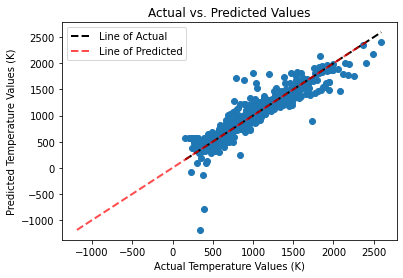

In [97]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label='Line of Actual', lw=2)
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], 'r--', label='Line of Predicted', alpha=0.7, lw=2)
plt.xlabel("Actual Temperature Values (K)")
plt.ylabel("Predicted Temperature Values (K)")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

### Truncated Result
This chart is the same as the last chart, but truncates the negative values to get a good focus on the cluster.  As we can see, the model generally predicts very well, and both lines once again fit nicely.

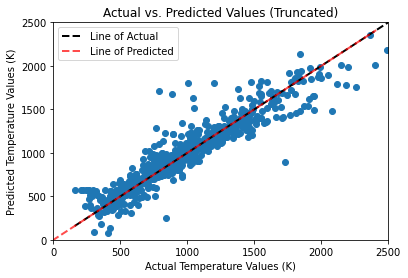

In [98]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label='Line of Actual', lw=2)
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], 'r--', label='Line of Predicted', alpha=0.7, lw=2)
plt.xlabel("Actual Temperature Values (K)")
plt.ylabel("Predicted Temperature Values (K)")
plt.title("Actual vs. Predicted Values (Truncated)")
plt.xlim(0, 2500)
plt.ylim(0, 2500)
plt.legend()
plt.show()

# Discussion/Conclusion

Utilizing exoplanet data about the star, planet radius, planet orbit, and other information, there emerges a promising capability to forecast exoplanet temperatures with a degree of accuracy deemed reasonable. The intricacies inherent in this endeavor reveal that unconventional parameters, such as significantly elevated C values in SVM models, can yield models that perform considerably well. The complexity of the problem persists, however, as no **singular value within the data matrix exhibits a notably close correlation with temperature.** This presents a formidable obstacle for prediction using supervised learning methods. Nonetheless, certain values within the dataset exhibit weak correlations with temperature, suggesting that a comprehensive amalgamation of these disparate factors, when coupled with an appropriate model, can culminate in the attainment of a predictable outcome.

The process of predicting exoplanet temperatures proved to be exceptionally challenging, necessitating a substantial investment of time and computational resources across numerous model iterations. Achieving satisfactory results on test data demanded exhaustive experimentation with various model configurations. Notably, traditional linear regression methods, as found in textbooks, proved inadequate for accurate prediction. Instead, the task mandated the utilization of more sophisticated supervised learning techniques, such as Support Vector Machines (SVM). Delving into the realm of SVM required a systematic exploration of many parameters, reflecting the intricate nature of the problem and the need for advanced methodologies to adequately address it.  Specifically, Support Vector Regression (SVR) was used.

After a rigorous optimization process, I was pleased with the model's performance, but more optimization could improve the model even more. Through diligent exploration and experimentation, I'm delighted to conclude the successful creation of a model capable of addressing the challenge of predicting exoplanet temperatures.

# References
Berta-Thompson, Z. (2018). Exoplanet Data. Boulder; https://zkbt.github.io/planet-data/transiting-exoplanets.txt. 